## 1. Setup
#### get the API key from Binance

In [1]:
apikey = 'E00kMWzGF4cUbuOJQ8eJNa2WNssfvHxqF5QgIJOYEU4TuenllcAH1ySV1SjJpXr9'
secretapi = 'MoSqccqMhgQ0dZC0T36z1nhtdjSRo5BUM11nTSxXzkeZ2wuo33wDxG2yAMR7stW2'

### Install the
   __python-binance__ package to be able to connect to the API
   
   __mplfinance__ to visualise finance data easily

In [2]:
!pip install python-binance mplfinance

In [3]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

## 2. Authenticate

In [4]:
# setup a client and authenticate to Binance
client = Client(apikey, secretapi)

## 3. Get Tickers

Tickers are a trading 'symbol' or shortened name (typically in capital letters) that refer to a coin on a trading platform. For example: BNB

In [5]:
tickers = client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.08166800'},
 {'symbol': 'LTCBTC', 'price': '0.00294200'},
 {'symbol': 'BNBBTC', 'price': '0.01410400'},
 {'symbol': 'NEOBTC', 'price': '0.00045900'},
 {'symbol': 'QTUMETH', 'price': '0.00197400'},
 {'symbol': 'EOSETH', 'price': '0.00098700'},
 {'symbol': 'SNTETH', 'price': '0.00001761'},
 {'symbol': 'BNTETH', 'price': '0.00029800'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00012150'},
 {'symbol': 'BNBETH', 'price': '0.17270000'},
 {'symbol': 'BTCUSDT', 'price': '18862.84000000'},
 {'symbol': 'ETHUSDT', 'price': '1540.37000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001348'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [6]:
tickers[0]['price']

'0.08166800'

In [7]:
ticker_df = pd.DataFrame(tickers)

In [8]:
ticker_df.head(15)

,symbol,price
0,ETHBTC,0.08166800
1,LTCBTC,0.00294200
2,BNBBTC,0.01410400
3,NEOBTC,0.00045900
4,QTUMETH,0.00197400
5,EOSETH,0.00098700
6,SNTETH,0.00001761
7,BNTETH,0.00029800
8,BCCBTC,0.07908100
9,GASBTC,0.00012150


In [9]:
ticker_df.set_index('symbol', inplace=True)

## 4. Get Market Depth

In [10]:
depth = client.get_order_book(symbol='ETHBTC')
depth

{'lastUpdateId': 5877951764,
 'bids': [['0.08165200', '0.18560000'],
  ['0.08165100', '1.04460000'],
  ['0.08164700', '0.44540000'],
  ['0.08163900', '0.38000000'],
  ['0.08163600', '0.09990000'],
  ['0.08163200', '0.09990000'],
  ['0.08163000', '0.21220000'],
  ['0.08162800', '0.09990000'],
  ['0.08162400', '0.64050000'],
  ['0.08162300', '1.46990000'],
  ['0.08162200', '1.33660000'],
  ['0.08162100', '0.11270000'],
  ['0.08162000', '0.09990000'],
  ['0.08161700', '0.67660000'],
  ['0.08161600', '0.09990000'],
  ['0.08161300', '0.70000000'],
  ['0.08161200', '0.10990000'],
  ['0.08161000', '0.04700000'],
  ['0.08160900', '3.73210000'],
  ['0.08160800', '0.00190000'],
  ['0.08160700', '0.79180000'],
  ['0.08160600', '0.74400000'],
  ['0.08160500', '1.78780000'],
  ['0.08160400', '0.70000000'],
  ['0.08160100', '0.78550000'],
  ['0.08160000', '1.95760000'],
  ['0.08159900', '1.53050000'],
  ['0.08159700', '0.00200000'],
  ['0.08159600', '0.09990000'],
  ['0.08159500', '0.53990000'],
  [

In [11]:
# displaying the bids without the asks value
depth_df = pd.DataFrame(depth['bids'])
depth_df.columns = ['Price', 'Volume']
depth_df.head()

,Price,Volume
0,0.08165200,0.18560000
1,0.08165100,1.04460000
2,0.08164700,0.44540000
3,0.08163900,0.38000000
4,0.08163600,0.09990000


In [12]:
# displaying the asks without the bids value
depth_df = pd.DataFrame(depth['asks'])
depth_df.columns = ['Price', 'Volume']
depth_df.head()

,Price,Volume
0,0.08165300,5.39440000
1,0.08165600,1.54650000
2,0.08165700,0.34370000
3,0.08165800,1.71430000
4,0.08165900,0.09990000


In [13]:
depth_df.dtypes

Price     object
Volume    object
dtype: object

To make visualisations and calculations, the data should be casted/converted to numeric values

## 5. Get Historical Data

In [14]:
#  [
#   [
#     1499040000000,      // Open time
#     "0.01634790",       // Open
#     "0.80000000",       // High
#     "0.01575800",       // Low
#     "0.01577100",       // Close
#     "148976.11427815",  // Volume
#     1499644799999,      // Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "17928899.62484339" // Ignore.
#   ]
# ]

# a dictionary to show the meaning of the columns below

In [15]:
client.get_historical_klines??

In [17]:
# grab the daily interval of the data
# get_historical_klines -> The historical klines function allows you to retrieve Spot and Futures OHLCV data from Binance.
historical = client.get_historical_klines('ETHBTC', Client.KLINE_INTERVAL_1DAY, '3 Sep 2009')
historical

[[1499990400000,
  '0.08000000',
  '0.09103300',
  '0.08000000',
  '0.09099300',
  '1942.05700000',
  1500076799999,
  '170.23852396',
  1994,
  '1076.40500000',
  '94.82527222',
  '0'],
 [1500076800000,
  '0.09099300',
  '0.09369900',
  '0.08712700',
  '0.08763500',
  '4013.06600000',
  1500163199999,
  '363.03178785',
  4623,
  '2250.31800000',
  '203.54149755',
  '0'],
 [1500163200000,
  '0.08750800',
  '0.08763500',
  '0.07559100',
  '0.08224100',
  '8904.15800000',
  1500249599999,
  '722.21248196',
  8137,
  '5557.57500000',
  '450.34388688',
  '0'],
 [1500249600000,
  '0.08236800',
  '0.08839400',
  '0.08169900',
  '0.08753700',
  '6650.93300000',
  1500335999999,
  '568.24653804',
  7639,
  '3859.48500000',
  '329.66875309',
  '0'],
 [1500336000000,
  '0.08783100',
  '0.10906800',
  '0.08477700',
  '0.10773200',
  '7245.74100000',
  1500422399999,
  '674.49785037',
  8121,
  '4202.05500000',
  '393.11140275',
  '0'],
 [1500422400000,
  '0.10773200',
  '0.10873200',
  '0.0842900

In [18]:
hist_df = pd.DataFrame(historical)

In [19]:
hist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1499990400000,0.08000000,0.09103300,0.08000000,0.09099300,1942.05700000,1500076799999,170.23852396,1994,1076.40500000,94.82527222,0
1,1500076800000,0.09099300,0.09369900,0.08712700,0.08763500,4013.06600000,1500163199999,363.03178785,4623,2250.31800000,203.54149755,0
2,1500163200000,0.08750800,0.08763500,0.07559100,0.08224100,8904.15800000,1500249599999,722.21248196,8137,5557.57500000,450.34388688,0
3,1500249600000,0.08236800,0.08839400,0.08169900,0.08753700,6650.93300000,1500335999999,568.24653804,7639,3859.48500000,329.66875309,0
4,1500336000000,0.08783100,0.10906800,0.08477700,0.10773200,7245.74100000,1500422399999,674.49785037,8121,4202.05500000,393.11140275,0


In [20]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [21]:
hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1499990400000,0.08000000,0.09103300,0.08000000,0.09099300,1942.05700000,1500076799999,170.23852396,1994,1076.40500000,94.82527222,0
1,1500076800000,0.09099300,0.09369900,0.08712700,0.08763500,4013.06600000,1500163199999,363.03178785,4623,2250.31800000,203.54149755,0
2,1500163200000,0.08750800,0.08763500,0.07559100,0.08224100,8904.15800000,1500249599999,722.21248196,8137,5557.57500000,450.34388688,0
3,1500249600000,0.08236800,0.08839400,0.08169900,0.08753700,6650.93300000,1500335999999,568.24653804,7639,3859.48500000,329.66875309,0
4,1500336000000,0.08783100,0.10906800,0.08477700,0.10773200,7245.74100000,1500422399999,674.49785037,8121,4202.05500000,393.11140275,0


In [22]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1877,1662163200000,0.07895700,0.07895700,0.07765700,0.07853000,44669.40340000,1662249599999,3503.43071632,151723,22504.59560000,1765.20862014,0
1878,1662249600000,0.07853000,0.07940000,0.07837000,0.07895400,39759.49800000,1662335999999,3133.12117426,136637,19626.65450000,1546.67133161,0
1879,1662336000000,0.07894800,0.08203100,0.07894100,0.08171800,99437.90550000,1662422399999,7947.07497962,229605,60387.80920000,4823.08004762,0
1880,1662422400000,0.08171800,0.08481000,0.08160600,0.08296000,130800.48040000,1662508799999,10907.28002216,328930,66687.90540000,5560.67657641,0
1881,1662508800000,0.08296000,0.08317200,0.08021500,0.08163000,53117.70910000,1662595199999,4304.81023394,142748,24512.87270000,1986.28959772,0


In [23]:
hist_df.shape

(1882, 12)

## 6. Pre-process Historical Data

In [24]:
hist_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

In [25]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

In [26]:
hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2017-07-14,0.08000000,0.09103300,0.08000000,0.09099300,1942.05700000,2017-07-14 23:59:59.999000064,170.23852396,1994,1076.40500000,94.82527222,0
1,2017-07-15,0.09099300,0.09369900,0.08712700,0.08763500,4013.06600000,2017-07-15 23:59:59.999000064,363.03178785,4623,2250.31800000,203.54149755,0
2,2017-07-16,0.08750800,0.08763500,0.07559100,0.08224100,8904.15800000,2017-07-16 23:59:59.999000064,722.21248196,8137,5557.57500000,450.34388688,0
3,2017-07-17,0.08236800,0.08839400,0.08169900,0.08753700,6650.93300000,2017-07-17 23:59:59.999000064,568.24653804,7639,3859.48500000,329.66875309,0
4,2017-07-18,0.08783100,0.10906800,0.08477700,0.10773200,7245.74100000,2017-07-18 23:59:59.999000064,674.49785037,8121,4202.05500000,393.11140275,0


In [27]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [30]:
# filter the colums and apply the transformations on these sets -> from the above cell
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [31]:
hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2017-07-14,0.080000,0.091033,0.080000,0.090993,1942.057,2017-07-14 23:59:59.999000064,170.238524,1994,1076.405,94.825272,0
1,2017-07-15,0.090993,0.093699,0.087127,0.087635,4013.066,2017-07-15 23:59:59.999000064,363.031788,4623,2250.318,203.541498,0
2,2017-07-16,0.087508,0.087635,0.075591,0.082241,8904.158,2017-07-16 23:59:59.999000064,722.212482,8137,5557.575,450.343887,0
3,2017-07-17,0.082368,0.088394,0.081699,0.087537,6650.933,2017-07-17 23:59:59.999000064,568.246538,7639,3859.485,329.668753,0
4,2017-07-18,0.087831,0.109068,0.084777,0.107732,7245.741,2017-07-18 23:59:59.999000064,674.497850,8121,4202.055,393.111403,0


In [32]:
hist_df.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [33]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           1882 non-null   datetime64[ns]
 1   Open                1882 non-null   float64       
 2   High                1882 non-null   float64       
 3   Low                 1882 non-null   float64       
 4   Close               1882 non-null   float64       
 5   Volume              1882 non-null   float64       
 6   Close Time          1882 non-null   datetime64[ns]
 7   Quote Asset Volume  1882 non-null   float64       
 8   Number of Trades    1882 non-null   int64         
 9   TB Base Volume      1882 non-null   float64       
 10  TB Quote Volume     1882 non-null   float64       
 11  Ignore              1882 non-null   object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 176.6+ KB


## 7. Visualisations

In [34]:
import mplfinance as mpf

In [35]:
hist_df.set_index('Close Time').tail(100)

,Open Time,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2022-05-31 23:59:59.999000064,2022-05-31,0.062991,0.063269,0.060960,0.061062,157633.8933,9762.035058,215453,78826.1248,4880.643684,0
2022-06-01 23:59:59.999000064,2022-06-01,0.061062,0.061921,0.060128,0.060994,251980.7057,15375.894518,281678,119724.6102,7305.868788,0
2022-06-02 23:59:59.999000064,2022-06-02,0.060994,0.061444,0.059914,0.060228,215547.0123,13051.122161,250585,103519.9470,6269.519251,0
2022-06-03 23:59:59.999000064,2022-06-03,0.060228,0.060274,0.058912,0.059765,209728.2395,12485.251612,238790,104072.8800,6196.264153,0
2022-06-04 23:59:59.999000064,2022-06-04,0.059766,0.060609,0.059243,0.060420,106707.3456,6373.838503,132224,53407.2608,3190.690986,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-03 23:59:59.999000064,2022-09-03,0.078957,0.078957,0.077657,0.078530,44669.4034,3503.430716,151723,22504.5956,1765.208620,0
2022-09-04 23:59:59.999000064,2022-09-04,0.078530,0.079400,0.078370,0.078954,39759.4980,3133.121174,136637,19626.6545,1546.671332,0
2022-09-05 23:59:59.999000064,2022-09-05,0.078948,0.082031,0.078941,0.081718,99437.9055,7947.074980,229605,60387.8092,4823.080048,0


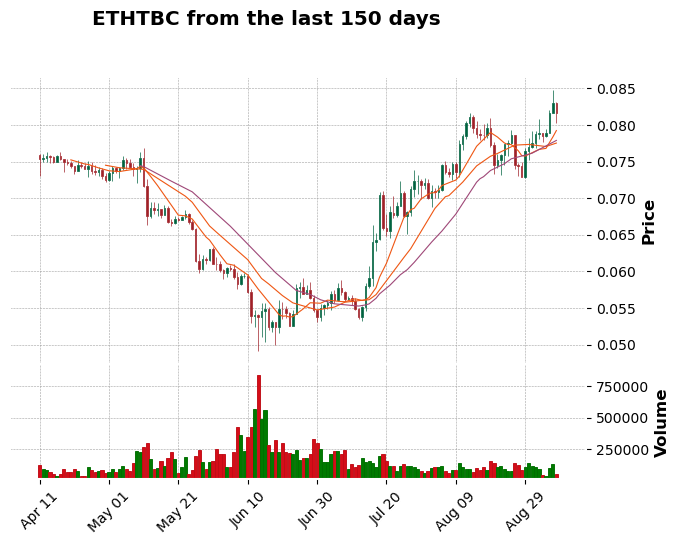

In [44]:
mpf.plot(hist_df.set_index('Close Time').tail(150),
        type='candle', style='charles', volume=True,
        title='ETHTBC from the last 150 days',
        mav=(10,20,30))